In [188]:
#k-means classificaton

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [190]:
dataset = pd.read_csv('Bank1.csv')

In [192]:
dataset.head()

,Age,Sex,Region,Married,Car,Savingaccount,Mortageg,PEP
0,48,2,3,2,1,2,2,1
1,40,1,1,1,1,1,1,2
2,51,2,3,1,2,1,2,2
3,23,2,1,1,1,2,2,2
4,57,2,2,1,2,2,2,2


In [194]:
X =dataset.iloc[:,0:8].values
X

array([[48,  2,  3, ...,  2,  2,  1],
       [40,  1,  1, ...,  1,  1,  2],
       [51,  2,  3, ...,  1,  2,  2],
       ...,
       [64,  1,  3, ...,  2,  2,  1],
       [51,  2,  1, ...,  2,  1,  2],
       [46,  2,  1, ...,  1,  2,  1]], dtype=int64)

In [198]:
X = np.delete(X,7,axis=1)

In [200]:
X

array([[48,  2,  3, ...,  1,  2,  2],
       [40,  1,  1, ...,  1,  1,  1],
       [51,  2,  3, ...,  2,  1,  2],
       ...,
       [64,  1,  3, ...,  2,  2,  2],
       [51,  2,  1, ...,  2,  2,  1],
       [46,  2,  1, ...,  2,  1,  2]], dtype=int64)

In [212]:
# creating the elbow chart
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [214]:
wcss

[61107.880000000005,
 17053.970418696103,
 7434.425028296546,
 4408.79617708628,
 3478.584431769638,
 2320.0017199135727,
 1745.091076995625,
 1431.2475717104126,
 1292.0220090233274]

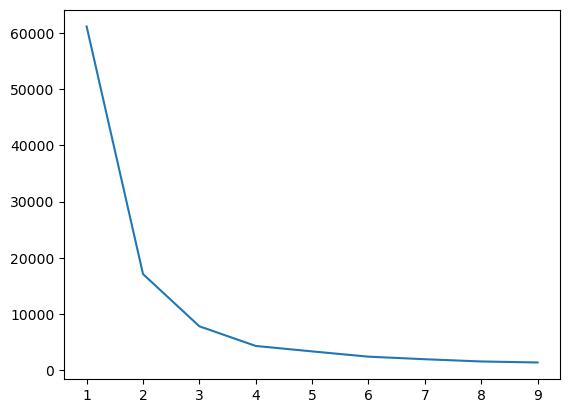

In [29]:
plt.plot(range(1,10),wcss)

In [222]:
kmeans1=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(X) 

In [224]:
y_kmeans

array([4, 8, 3, 6, 1, 1, 6, 1, 0, 3, 5, 3, 8, 5, 0, 0, 0, 4, 5, 7, 1, 3,
       3, 2, 6, 1, 4, 0, 0, 1, 1, 6, 4, 7, 8, 2, 6, 0, 8, 5, 3, 4, 5, 7,
       6, 5, 3, 2, 3, 4, 2, 0, 8, 4, 5, 3, 1, 2, 2, 7, 8, 5, 4, 6, 6, 8,
       6, 8, 7, 7, 2, 6, 0, 1, 5, 1, 4, 1, 7, 1, 3, 7, 2, 0, 5, 0, 2, 5,
       7, 3, 0, 2, 3, 1, 1, 6, 6, 7, 0, 6, 3, 2, 8, 8, 5, 8, 4, 6, 6, 7,
       0, 7, 3, 0, 1, 3, 1, 2, 0, 5, 4, 5, 0, 0, 4, 4, 0, 4, 8, 2, 8, 1,
       3, 5, 5, 3, 6, 1, 5, 5, 3, 4, 2, 5, 2, 1, 7, 6, 5, 7, 3, 8, 5, 7,
       8, 6, 3, 2, 1, 8, 6, 8, 4, 6, 8, 2, 6, 2, 0, 1, 3, 6, 0, 7, 5, 1,
       8, 8, 8, 5, 6, 1, 5, 4, 0, 4, 6, 4, 0, 8, 5, 0, 5, 8, 3, 3, 7, 3,
       2, 2, 7, 2, 4, 0, 2, 4, 3, 7, 8, 6, 2, 6, 5, 2, 1, 2, 0, 7, 2, 1,
       5, 4, 6, 1, 6, 8, 5, 3, 7, 0, 4, 5, 4, 8, 4, 6, 0, 5, 6, 6, 8, 4,
       8, 0, 6, 8, 3, 0, 3, 0, 8, 8, 1, 1, 2, 2, 7, 5, 6, 5, 8, 5, 6, 2,
       2, 1, 0, 7, 8, 5, 5, 3, 1, 8, 7, 7, 8, 8, 4, 4, 7, 4, 8, 6, 2, 5,
       0, 6, 2, 2, 1, 4, 1, 1, 4, 8, 3, 5, 3, 4])

In [226]:
pd.concat([dataset,pd.DataFrame(y_kmeans)],axis=1)

,Age,Sex,Region,Married,Car,Savingaccount,Mortageg,PEP,0
0,48,2,3,2,1,2,2,1,4
1,40,1,1,1,1,1,1,2,8
2,51,2,3,1,2,1,2,2,3
3,23,2,1,1,1,2,2,2,6
4,57,2,2,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...
295,44,1,3,1,2,2,1,1,8
296,50,1,1,2,1,1,1,1,3
297,64,1,3,2,2,2,2,1,5
298,51,2,1,2,2,2,1,2,3


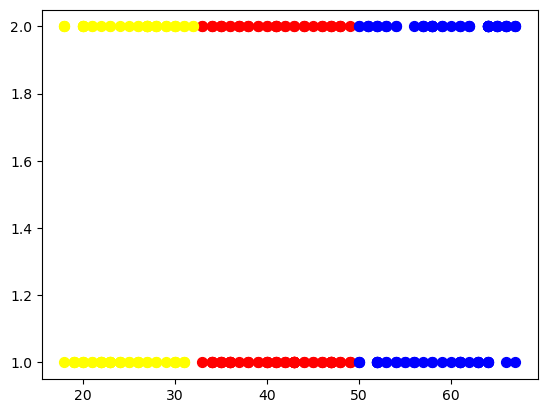

In [114]:
#visualize clusters

plt.scatter(X[y_kmeans==0,0],y=X[y_kmeans==0,1],s=50,c='red')
plt.scatter(X[y_kmeans==1,0],y=X[y_kmeans==1,1],s=50,c='blue')
plt.scatter(X[y_kmeans==2,0],y=X[y_kmeans==2,1],s=50,c='yellow')

In [116]:
clusters = kmeans1.cluster_centers_
print(clusters)

[[41.06140351  1.4122807   2.23684211  1.34210526  1.45614035  1.5
   1.59649123  1.52631579]
 [58.85294118  1.58823529  2.34313725  1.28431373  1.45098039  1.5
   1.70588235  1.45098039]
 [24.8452381   1.46428571  2.45238095  1.35714286  1.36904762  1.53571429
   1.6547619   1.66666667]]


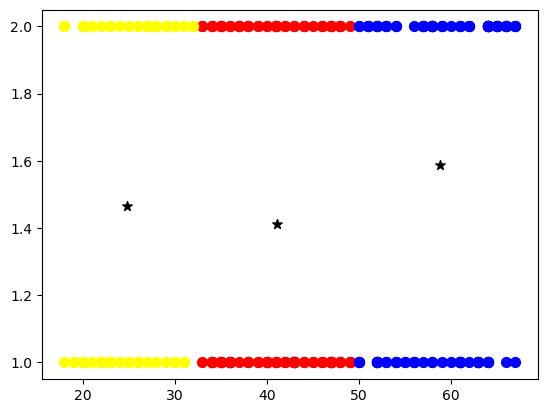

In [132]:
plt.scatter(X[y_kmeans==0,0],y=X[y_kmeans==0,1],s=50,c='red')
plt.scatter(X[y_kmeans==1,0],y=X[y_kmeans==1,1],s=50,c='blue')
plt.scatter(X[y_kmeans==2,0],y=X[y_kmeans==2,1],s=50,c='yellow')

plt.scatter(clusters[0][0],clusters[0][1],marker='*',s=50,c='black')
plt.scatter(clusters[1][0],clusters[1][1],marker='*',s=50,c='black')
plt.scatter(clusters[2][0],clusters[2][1],marker='*',s=50,c='black')


In [134]:
#question 02

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df1 = pd.read_csv('Bank1.csv')

In [138]:
df1.head()

,Age,Sex,Region,Married,Car,Savingaccount,Mortageg,PEP
0,48,2,3,2,1,2,2,1
1,40,1,1,1,1,1,1,2
2,51,2,3,1,2,1,2,2
3,23,2,1,1,1,2,2,2
4,57,2,2,1,2,2,2,2


In [142]:
#Separate the data frame into two parts
X =df1.values
Y=df1['PEP']

In [144]:
#deleting the class variable in the dataset

X = np.delete(X,7,axis=1)

In [146]:
X

array([[48,  2,  3, ...,  1,  2,  2],
       [40,  1,  1, ...,  1,  1,  1],
       [51,  2,  3, ...,  2,  1,  2],
       ...,
       [64,  1,  3, ...,  2,  2,  2],
       [51,  2,  1, ...,  2,  2,  1],
       [46,  2,  1, ...,  2,  1,  2]], dtype=int64)

In [161]:
#Split the dataset into test and training se

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=0)

In [163]:
print(X_train.shape)
print(Y_train.shape)


(210, 7)
(210,)


In [232]:
#Find the prediction of the Using Decision tree 

from sklearn import tree

df_clf = tree.DecisionTreeClassifier(max_depth=5)
df_clf.fit(X_train,Y_train)

df_clf.score(X_test,Y_test)

y_pred = df_clf.predict(X_test)

df_clf.score(X_test,Y_test)

0.7111111111111111

In [234]:
y_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1], dtype=int64)

In [236]:
#Construct the confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_pred)


array([[41,  9],
       [17, 23]], dtype=int64)